<a href="https://colab.research.google.com/github/tsangrebecca/BloomTech/blob/main/Sprint5/Module4/O3_ExpressAndExplainTheIntuitionAndInterpretationOfLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A logistic regression classifier is based on the sigmoid function which is an s-shaped curve. The equation for the sigmoid is given by:

\sigma(x) = \frac{1}{1+exp(-x)}

In [6]:
# The logistic sigmoid function (implemented to accept numpy arrays)
import numpy as np
# Imports for plotting
import matplotlib.pyplot as plt
# Import seaborn and load the data
import seaborn as sns

def sigmoid(x):
    return 1 / (1 + np.e**(-x))

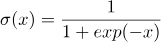

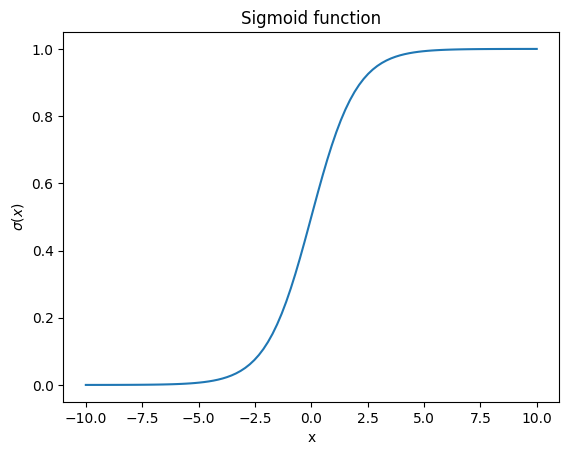

In [5]:
# Plot the function

x_plot = np.linspace(-10, 10, 100)
sig_y = sigmoid(x_plot)

# Plot the function generated above
plt.plot(x_plot, sig_y)
plt.xlabel('x'); plt.ylabel('$\sigma(x)$')
plt.title('Sigmoid function')

plt.show()

When we are fitting a model, we would like to find the coefficients that best fit the data. Including these coefficients results in an equation of this form:

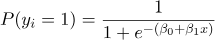

where P(y_i=1) is the probability of observation i being in class 1. The coefficients \beta_0 and \beta_1 determine the shape of the function and are what we are trying to fit when we model our data. When we know the coefficients, we can make a prediction of the class for an observation x.

In [7]:
geyser = sns.load_dataset("geyser")

# Choose one feature - we'll use the duration
x = geyser['duration']

# Import the label encoder and encode the 'kind' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Create a new column with 0=long and 1=short class labels
geyser['kind_binary'] = le.fit_transform(geyser['kind'])
display(geyser.head())

# Assign the target variable to y
y = geyser['kind_binary']

,duration,waiting,kind,kind_binary
0,3.600,79,long,0
1,1.800,54,short,1
2,3.333,74,long,0
3,2.283,62,short,1
4,4.533,85,long,0


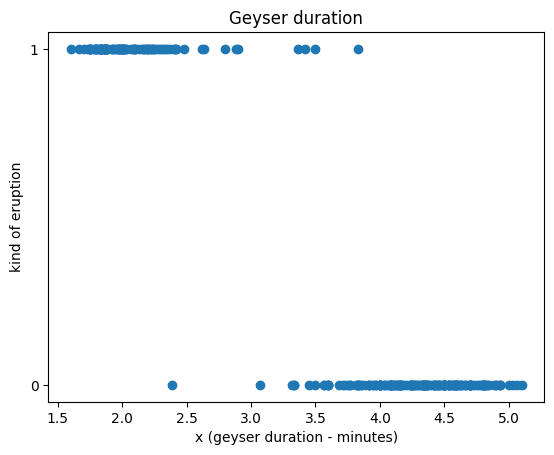

In [8]:
# Plot the data for 'duration'
plt.scatter(x, y)
plt.yticks([0, 1])
plt.xlabel('x (geyser duration - minutes)'); plt.ylabel('kind of eruption')
plt.title('Geyser duration')

plt.show()

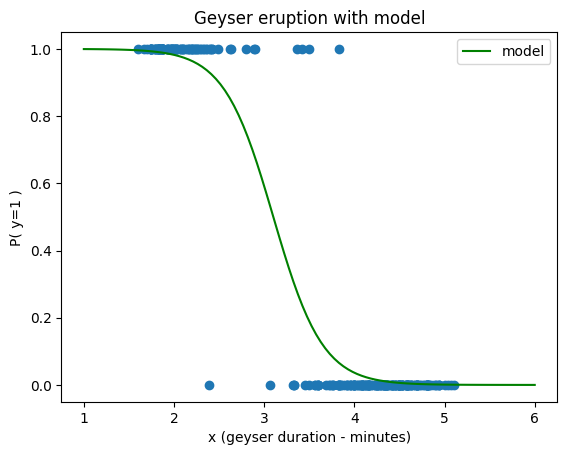

In [9]:
# Assign coefficient from previously fit model
beta_0 = 11.32
beta_1 = -3.65

# Define the sigmoid with the coefficients
def sigmoid_beta(x, beta_0, beta_1):
    exp = beta_0 + beta_1*x
    return 1 / (1 + np.e**(-exp))

x_model_plot = np.linspace(1, 6, 100)
y_model = sigmoid_beta(x_model_plot, beta_0, beta_1)

# Plot the function generated above
plt.scatter(x, y)
plt.plot(x_model_plot, y_model, color='green', label='model')
plt.xlabel('x (geyser duration - minutes)'); plt.ylabel('P( y=1 )')
plt.legend()
plt.title('Geyser eruption with model')

plt.show()

Now let's use our function with the model parameters to make and interpret a prediction. We'll pretend that we have visited the geyser site and viewed an eruption, which we timed to be 3.25 minutes. Which class would this eruption belong to and with what probability?

We know from the equation above that the probability is for the observation to belong to class=1 (short eruption). Plugging in the values for x (3.25 minutes) along with the coefficients gives us the following equation:

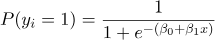

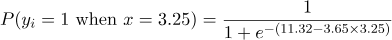

In [10]:
# Plug in the above values
sigmoid_beta(3.25, beta_0, beta_1)

0.3676062104304375

We interpret this result to mean that the probability of belonging to class=1 (short) is 37%. The probability of the observation belonging to class=0 (long) is 100%-37% = 63%. Our model predicts that an eruption with a duration of 3.25 minutes would belong to the long class of eruption.